/tmp/ipykernel_23246/652980452.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '49501.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'Capital'] = capital


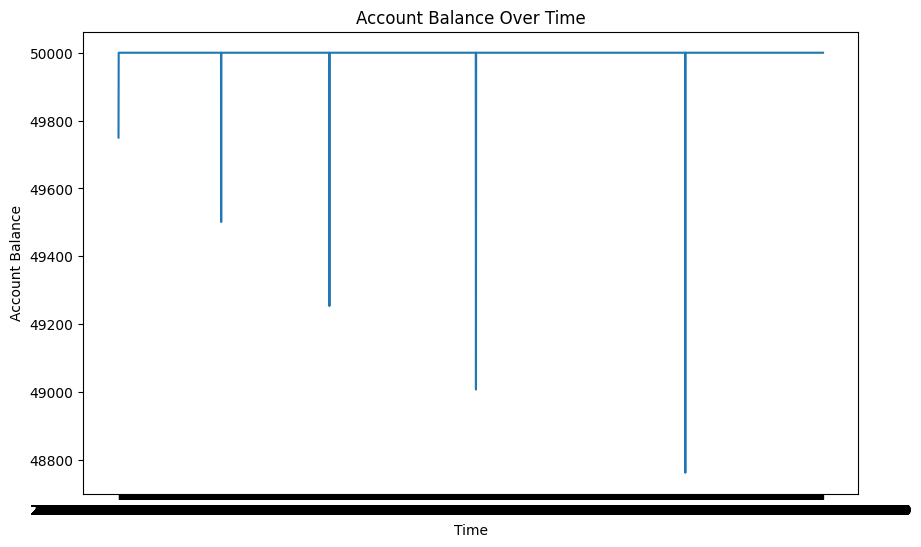

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def backtest_strategy(df, initial_capital, commission_fee, threshold):
    capital = initial_capital
    in_position = False

    for i in range(len(df)):
        current_diff = df.at[i, 'Percentage Difference']

        if not in_position and current_diff > threshold:
            # Enter position (short spot, long futures)
            capital *= (1 - commission_fee)  # Applying commission fee
            in_position = True
            df.at[i, 'Action'] = 'Enter'
            df.at[i, 'Capital'] = capital

        elif in_position and current_diff < -threshold:
            # Exit position (close all)
            capital *= (1 - commission_fee)  # Applying commission fee
            in_position = False
            df.at[i, 'Action'] = 'Exit'
            df.at[i, 'Capital'] = capital

    return df

def plot_results(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Capital'])
    plt.xlabel('Time')
    plt.ylabel('Account Balance')
    plt.title('Account Balance Over Time')
    plt.show()

# Main function
def main(coin_list, initial_capital, commission_fee, threshold):
    for coin in coin_list:
        try:
            file_path = f"{coin.lower()}_price_comparison.csv"
            df = pd.read_csv(file_path)
            df['Action'] = ''
            df['Capital'] = initial_capital

            df = backtest_strategy(df, initial_capital, commission_fee, threshold)
            plot_results(df)

        except FileNotFoundError:
            print(f"File not found: {file_path}")

# Parameters
initial_capital = 50000
commission_fee = 0.005  # 0.5%
threshold = 10  # 10%

# Coin list
coin_list = ['XAIUSDT']

# Run the backtest
main(coin_list, initial_capital, commission_fee, threshold)
